In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
categories = pd.read_csv('categories.csv')
cities = pd.read_csv('cities.csv')
countries = pd.read_csv('countries.csv')
customers = pd.read_csv('customers.csv')
employees = pd.read_csv('employees.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

In [3]:
categories.head()

,CategoryID,CategoryName
0,1,Confections
1,2,Shell fish
2,3,Cereals
3,4,Dairy
4,5,Beverages


In [4]:
cities.head()

,CityID,CityName,Zipcode,CountryID
0,1,Dayton,80563,32
1,2,Buffalo,17420,32
2,3,Chicago,44751,32
3,4,Fremont,20641,32
4,5,Virginia Beach,62389,32


In [5]:
countries.head()

,CountryID,CountryName,CountryCode
0,1,Armenia,AN
1,2,Canada,FO
2,3,Belize,MK
3,4,Uganda,LV
4,5,Thailand,VI


In [6]:
customers.head()

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address
0,1,Stefanie,Y,Frye,79,97 Oak Avenue
1,2,Sandy,T,Kirby,96,52 White First Freeway
2,3,Lee,T,Zhang,55,921 White Fabien Avenue
3,4,Regina,S,Avery,40,75 Old Avenue
4,5,Daniel,S,Mccann,2,283 South Green Hague Avenue


In [7]:
employees.head()

,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,Nicole,T,Fuller,1981-03-07 00:00:00.000,F,80,2011-06-20 07:15:36.920
1,2,Christine,W,Palmer,1968-01-25 00:00:00.000,F,4,2011-04-27 04:07:56.930
2,3,Pablo,Y,Cline,1963-02-09 00:00:00.000,M,70,2012-03-30 18:55:23.270
3,4,Darnell,O,Nielsen,1989-02-06 00:00:00.000,M,39,2014-03-06 06:55:02.780
4,5,Desiree,L,Stuart,1963-05-03 00:00:00.000,F,23,2014-11-16 22:59:54.720


In [8]:
products.head()

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


In [9]:
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [10]:
#Merge the different dataframes
# Merge customers with cities on CityID
merged_df = pd.merge(customers, cities, on='CityID', how='left')

In [11]:
# Merge the result with countries on CountryID
merged_df = pd.merge(merged_df, countries, on='CountryID', how='left')

In [12]:
# Merge the result with sales on CustomerID
merged_df = pd.merge(merged_df, sales, on='CustomerID', how='left')

In [13]:
# Merge the result with products on ProductID
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

In [14]:
# Merge the result with categories on CategoryID
merged_df = pd.merge(merged_df, categories, on='CategoryID', how='left')

In [15]:
# Merge the result with employees on CityID
merged_df = pd.merge(merged_df, employees, on='CityID', how='left')

In [16]:
# Display the merged dataframe
merged_df.head(2)

,CustomerID,FirstName_x,MiddleInitial_x,LastName_x,CityID,Address,CityName,Zipcode,CountryID,CountryName,...,IsAllergic,VitalityDays,CategoryName,EmployeeID,FirstName_y,MiddleInitial_y,LastName_y,BirthDate,Gender,HireDate
0,1,Stefanie,Y,Frye,79,97 Oak Avenue,Oklahoma,40472,32,United States,...,False,0.0,Poultry,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Stefanie,Y,Frye,79,97 Oak Avenue,Oklahoma,40472,32,United States,...,False,87.0,Produce,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105034 entries, 0 to 7105033
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CustomerID         int64  
 1   FirstName_x        object 
 2   MiddleInitial_x    object 
 3   LastName_x         object 
 4   CityID             int64  
 5   Address            object 
 6   CityName           object 
 7   Zipcode            int64  
 8   CountryID          int64  
 9   CountryName        object 
 10  CountryCode        object 
 11  SalesID            int64  
 12  SalesPersonID      int64  
 13  ProductID          int64  
 14  Quantity           int64  
 15  Discount           float64
 16  TotalPrice         float64
 17  SalesDate          object 
 18  TransactionNumber  object 
 19  ProductName        object 
 20  Price              float64
 21  CategoryID         int64  
 22  Class              object 
 23  ModifyDate         object 
 24  Resistant          object 
 25  IsAllergic        

In [18]:
#drop columns that are irrelevant to my analysis
columns_to_drop = ['EmployeeID', 'FirstName_y', 'MiddleInitial_y', 'LastName_y', 'BirthDate', 'Gender', 'HireDate', 'CityID', 'CountryID', 'CustomerID', 'ProductID', 'CategoryID','SalesID','SalesPersonID']
merged_df.drop(columns=columns_to_drop, axis=1, inplace=True)

<Axes: >

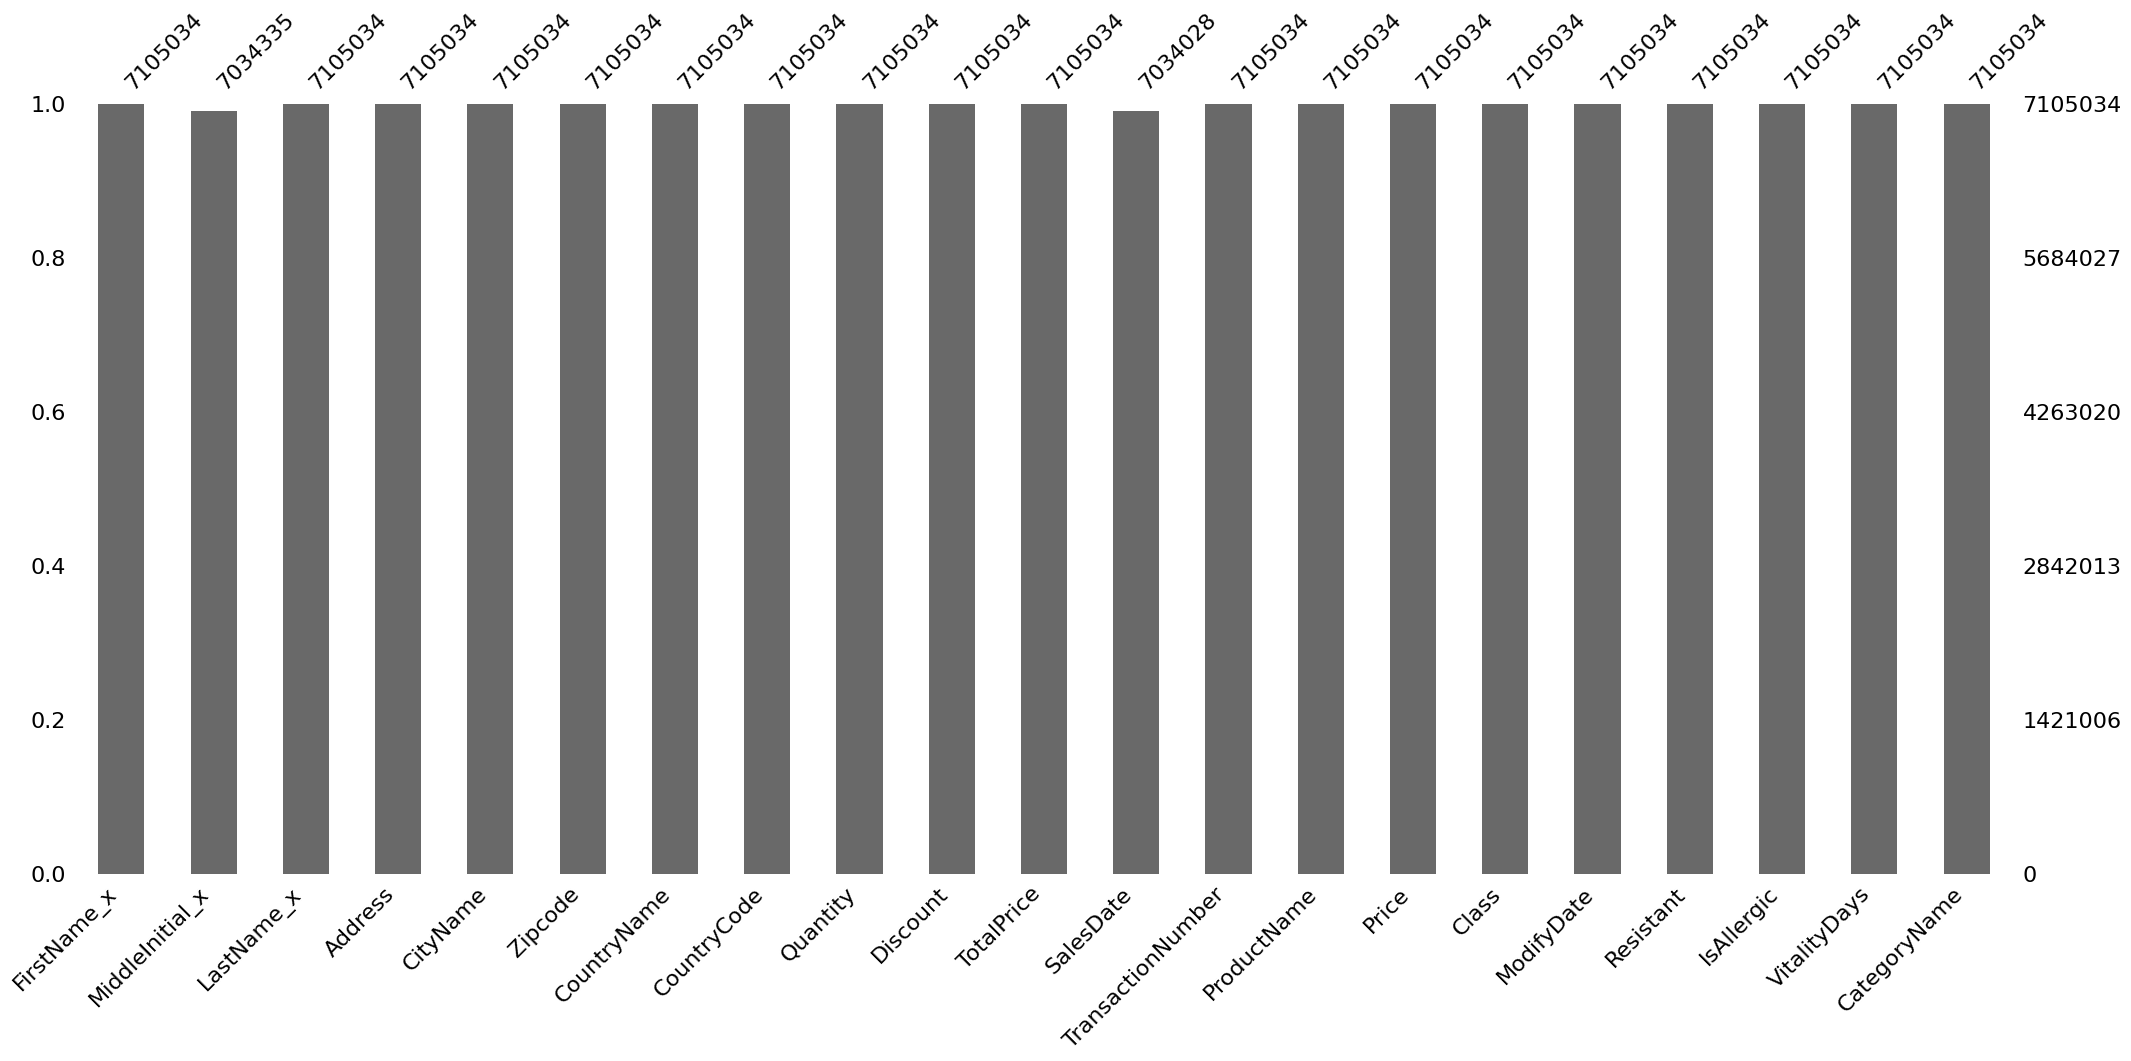

In [19]:
#visualize missing values with missingno
msno.bar(merged_df)

<Axes: >

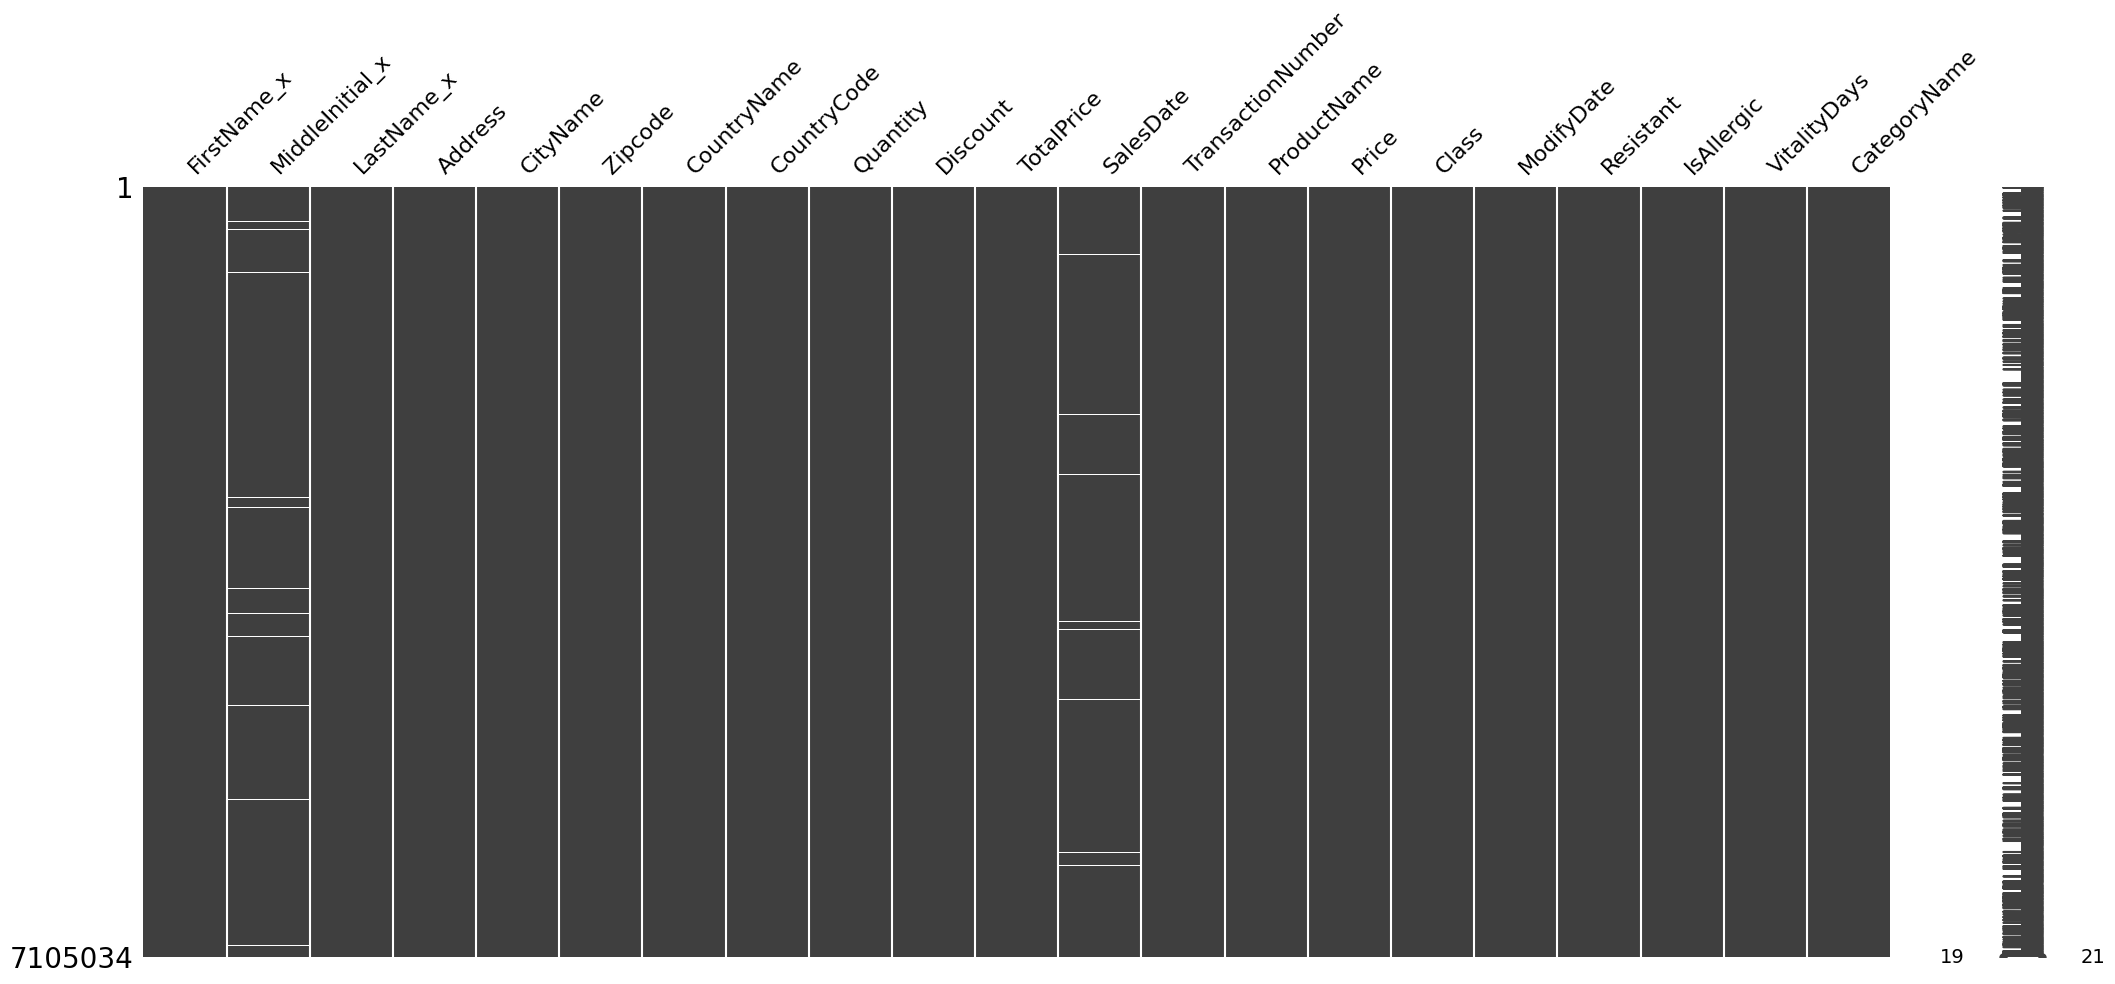

In [20]:
msno.matrix(merged_df)

#### Data Cleaning

In [21]:
#check for missing values
Missing_values = merged_df.isnull().sum().sort_values(ascending=False)
print(Missing_values)

SalesDate            71006
MiddleInitial_x      70699
FirstName_x              0
Address                  0
LastName_x               0
CityName                 0
Zipcode                  0
CountryCode              0
CountryName              0
Quantity                 0
Discount                 0
TotalPrice               0
TransactionNumber        0
ProductName              0
Price                    0
Class                    0
ModifyDate               0
Resistant                0
IsAllergic               0
VitalityDays             0
CategoryName             0
dtype: int64


In [22]:
#coverting sales date to datetime
merged_df['SalesDate'] = pd.to_datetime(merged_df['SalesDate'])

In [23]:
#fill missing values in the MiddleInitial column with mode
merged_df['MiddleInitial_x'].fillna(merged_df['MiddleInitial_x'].mode()[0], inplace=True)

In [24]:
# fill missing values in the SalesDate column with mean
merged_df['SalesDate'].fillna(merged_df['SalesDate'].mean(), inplace=True)

In [25]:
#drop duplicates
merged_df.drop_duplicates(inplace=True)

In [26]:
#check for duplicates
duplicates = merged_df.duplicated().sum()
print(duplicates)

0


##### Sales Performance Analysis

In [27]:
#Total sales Revenue
merged_df['TotalSales'] = merged_df['Quantity'] * merged_df['Price']
total_sales_revenue = round(merged_df['TotalSales'].sum(),2)
print(total_sales_revenue)

4466259165.52


In [28]:
#Total Sales over time
merged_df['Year'] = merged_df['SalesDate'].dt.year
merged_df['Month'] = merged_df['SalesDate'].dt.month
merged_df['Day'] = merged_df['SalesDate'].dt.day
merged_df['Day_of_week'] = merged_df['SalesDate'].dt.dayofweek

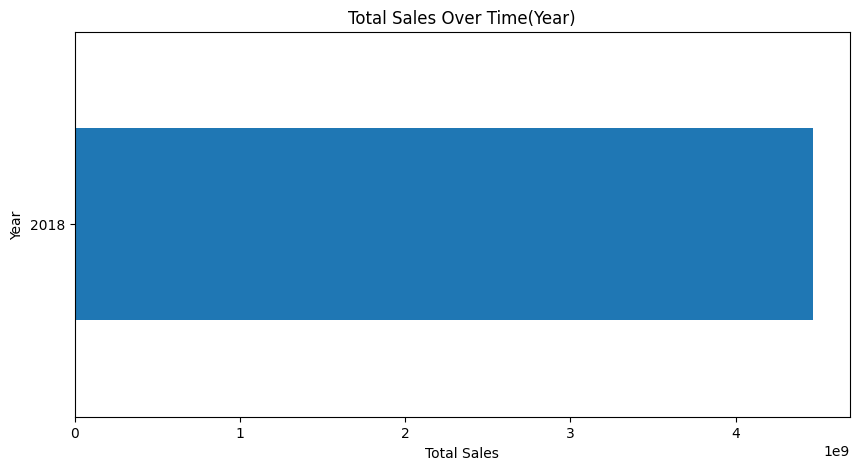

In [ ]:
#plot total sales over time by year
merged_df.groupby('Year')['TotalSales'].sum().plot(kind='barh',figsize=(10,5))
plt.title('Total Sales Over Time(Year)')
plt.xlabel('Total Sales')
plt.ylabel('Year')
plt.show()

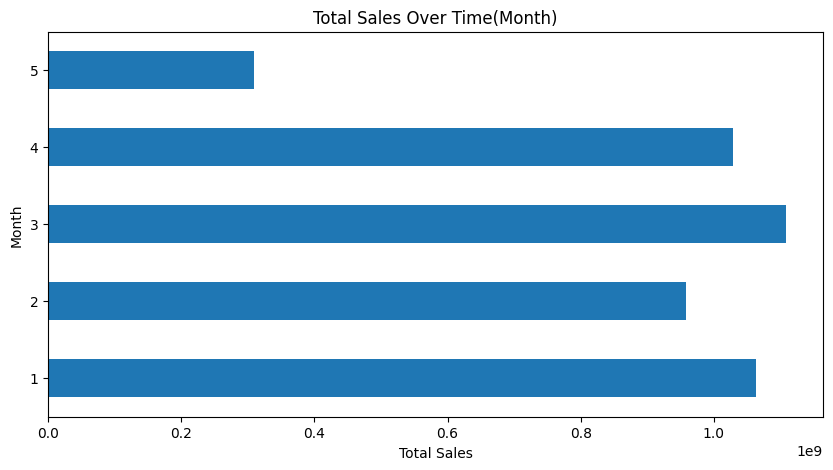

In [46]:
#The total sales over time by month
merged_df.groupby('Month')['TotalSales'].sum().plot(kind='barh',figsize=(10,5))
plt.title('Total Sales Over Time(Month)')
plt.xlabel('Total Sales')
plt.ylabel('Month')
plt.show()


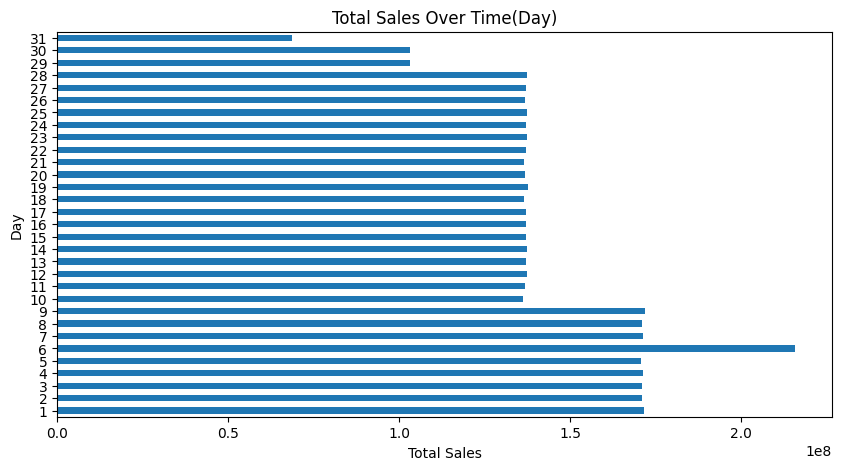

In [47]:
# The total sales over time by day
merged_df.groupby('Day')['TotalSales'].sum().plot(kind='barh',figsize=(10,5))
plt.title('Total Sales Over Time(Day)')
plt.xlabel('Total Sales')
plt.ylabel('Day')
plt.show()

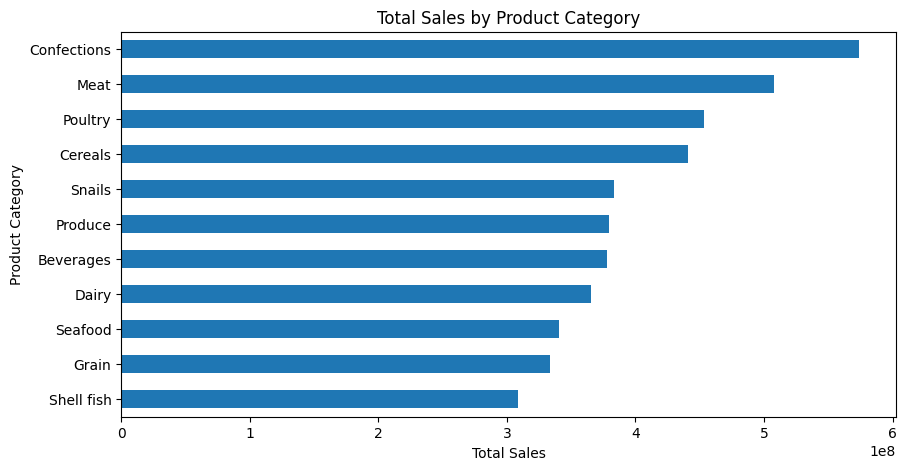

In [32]:
#Top_selling product category
merged_df.groupby('CategoryName')['TotalSales'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

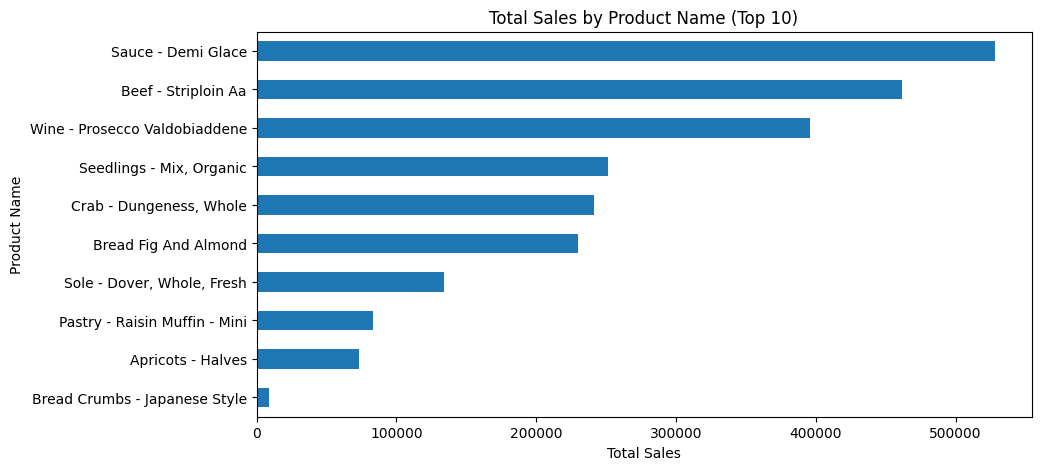

In [33]:
#Top selling Products(Top 10)
merged_df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=True).head(10).plot(kind='barh', figsize=(10,5))
plt.title('Total Sales by Product Name (Top 10)')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

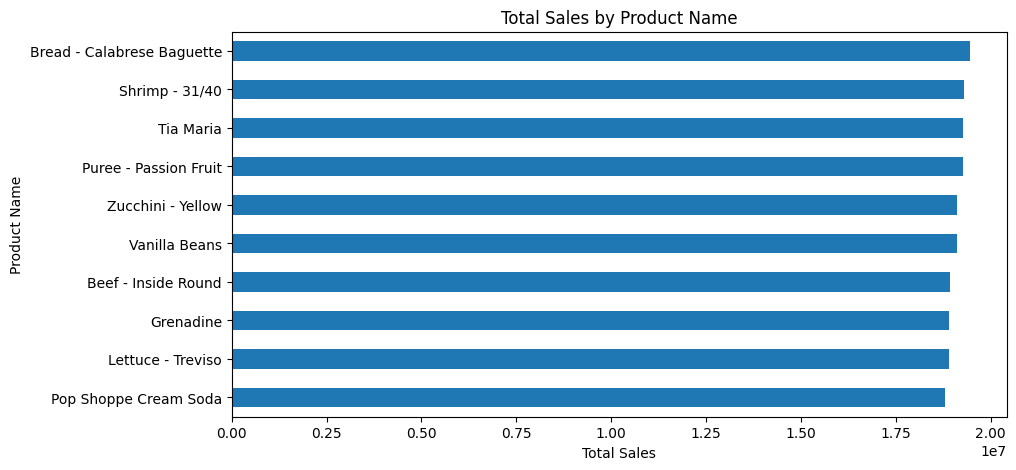

In [34]:
#Least Selling product name (least 10)
merged_df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,5))
plt.title('Total Sales by Product Name')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

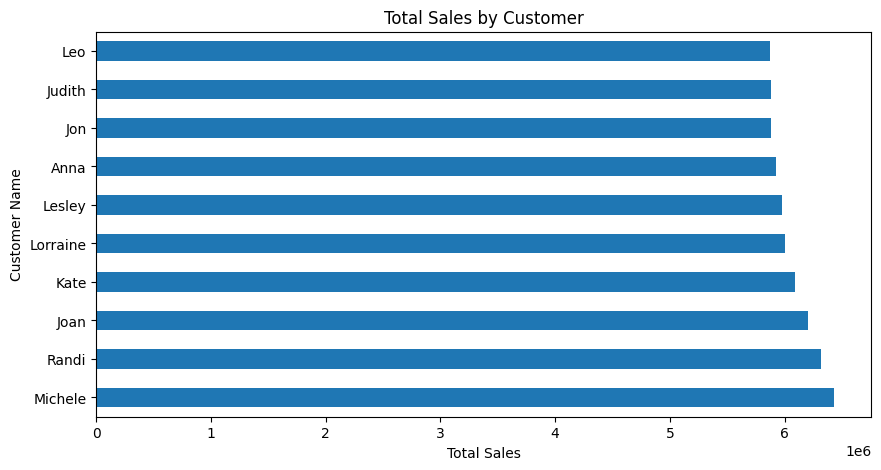

In [35]:
#Total sales by customer
merged_df.groupby('FirstName_x')['TotalSales'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))
plt.title('Total Sales by Customer')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()


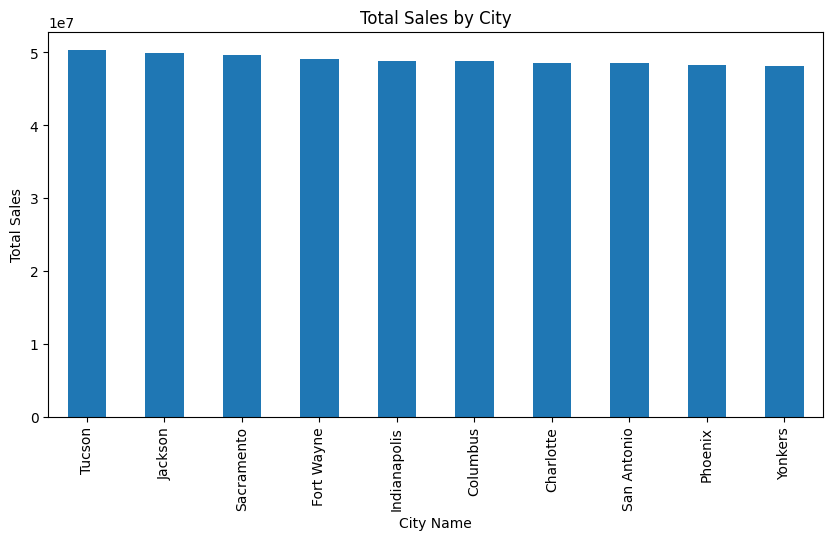

In [36]:
#Total sales by city
merged_df.groupby('CityName')['TotalSales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Total Sales by City')
plt.xlabel('City Name')
plt.ylabel('Total Sales')
plt.show()

#### Customer Behavior Analysis

In [37]:
#Customer Segmentation
# Group by customer and calculate total spending, purchase frequency, and average spending per purchase
customer_grouped = merged_df.groupby('FirstName_x').agg(
    total_spending=pd.NamedAgg(column='TotalSales', aggfunc='sum'),
    purchase_frequency=pd.NamedAgg(column='SalesDate', aggfunc='count'),
    avg_spending_per_purchase=pd.NamedAgg(column='TotalSales', aggfunc='mean')
).reset_index()
# Display the grouped data
customer_grouped.sort_values(by='total_spending', ascending=False).head(10)

,FirstName_x,total_spending,purchase_frequency,avg_spending_per_purchase
667,Michele,6.434578e+06,8934,720.234834
747,Randi,6.321317e+06,9607,657.990773
455,Joan,6.204953e+06,9344,664.057443
503,Kate,6.088421e+06,8489,717.212952
601,Lorraine,6.003437e+06,7909,759.063980
580,Lesley,5.980826e+06,8770,681.964176
58,Anna,5.922552e+06,8374,707.254888
472,Jon,5.885851e+06,8172,720.246028
487,Judith,5.882550e+06,8260,712.173178
575,Leo,5.876037e+06,8251,712.160627


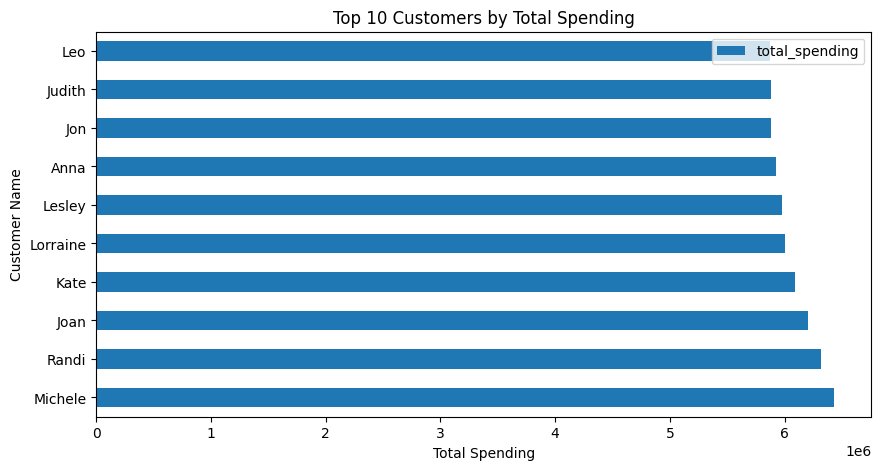

In [38]:
#visualize the customer_grouped by total spending
customer_grouped.sort_values(by='total_spending', ascending=False).head(10).plot(kind='barh', x='FirstName_x', y='total_spending', figsize=(10,5))
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

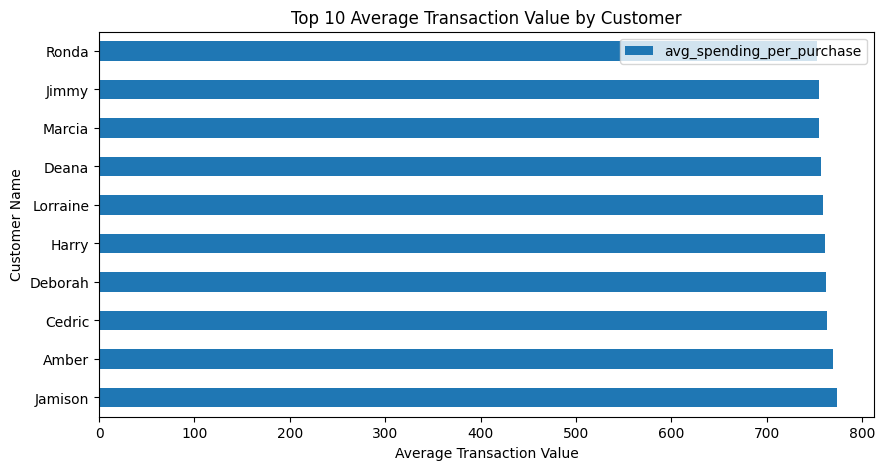

In [39]:
#Visualize the top 10 average spending per purchase by customer
customer_grouped.sort_values(by='avg_spending_per_purchase', ascending=False).head(10).plot(kind='barh', x='FirstName_x', y='avg_spending_per_purchase',figsize=(10,5))
plt.title('Top 10 Average Transaction Value by Customer')
plt.xlabel('Average Transaction Value')
plt.ylabel('Customer Name')
plt.show()

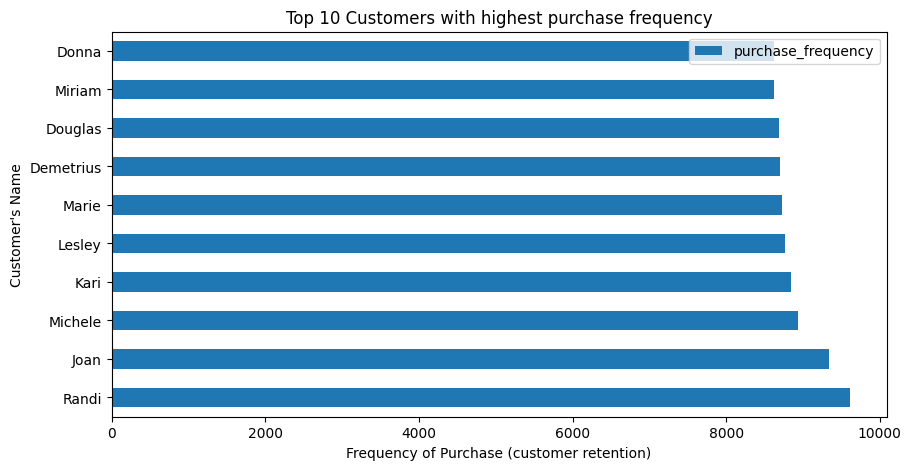

In [40]:
#visualize the Top 10 with highest purchase Frequency
purchase_frequency_per_Customers = customer_grouped.sort_values(by='purchase_frequency', ascending=False).head(10)
(purchase_frequency_per_Customers).plot(kind='barh',x='FirstName_x',y='purchase_frequency',figsize=(10,5))
plt.title('Top 10 Customers with highest purchase frequency')
plt.xlabel('Frequency of Purchase (customer retention)')
plt.ylabel("Customer's Name")
plt.show()

Text(0.5, 1.0, 'Product Resistance')

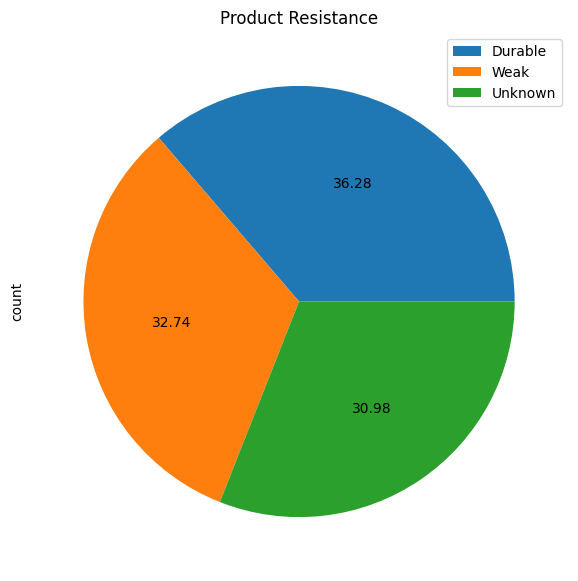

In [41]:
#Product Resistance
def autopct(pct): #only show the label when it's >10%
    return (f'%.2f'%pct) if pct > 10 else '' 
merged_df['Resistant'].value_counts(ascending=False).plot(kind='pie', figsize=(10,7),legend=True, autopct=autopct, labels=None)
plt.title("Product Resistance")

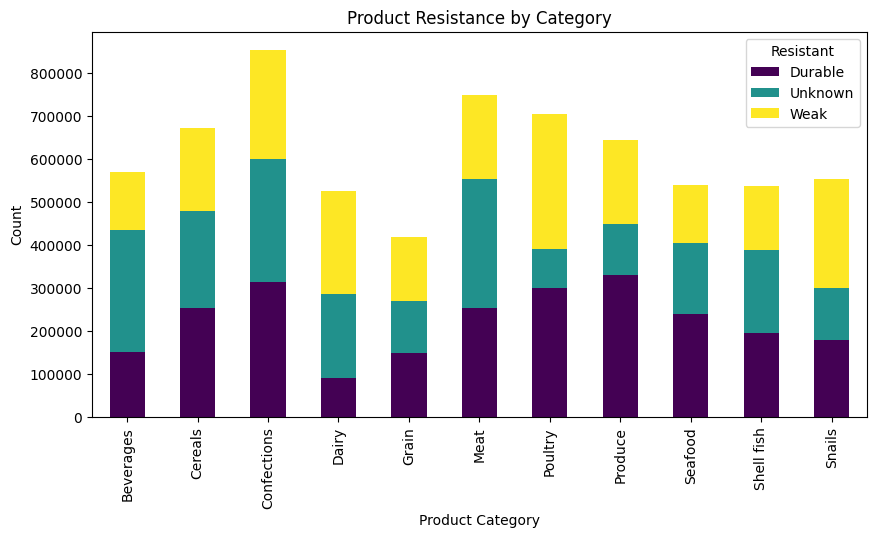

In [42]:
#Product Resistance by Category
merged_df.groupby('CategoryName')['Resistant'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5), colormap='viridis')
plt.title('Product Resistance by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

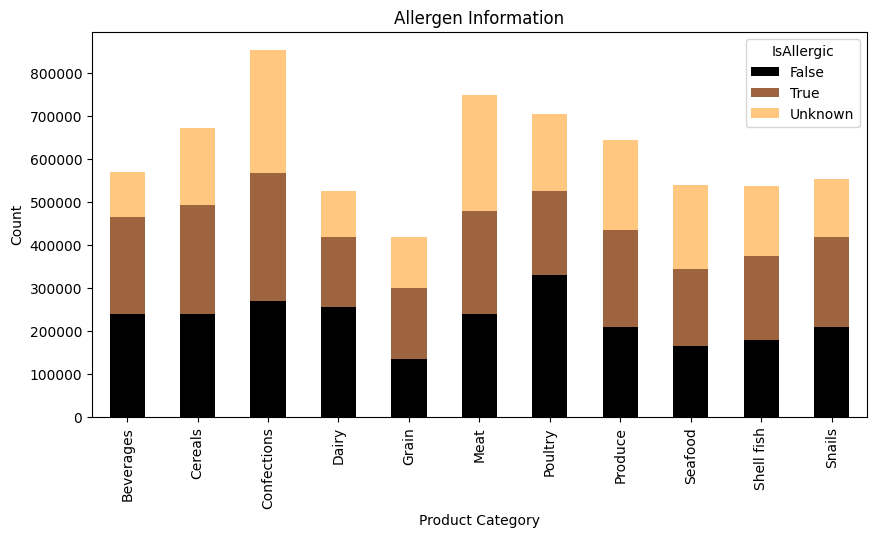

In [ ]:
#Product Allergen Information
merged_df.groupby('CategoryName')['IsAllergic'].value_counts().unstack().plot(kind='bar', stacked=True,figsize=(10,5), colormap='copper')
plt.title('Allergen Information')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

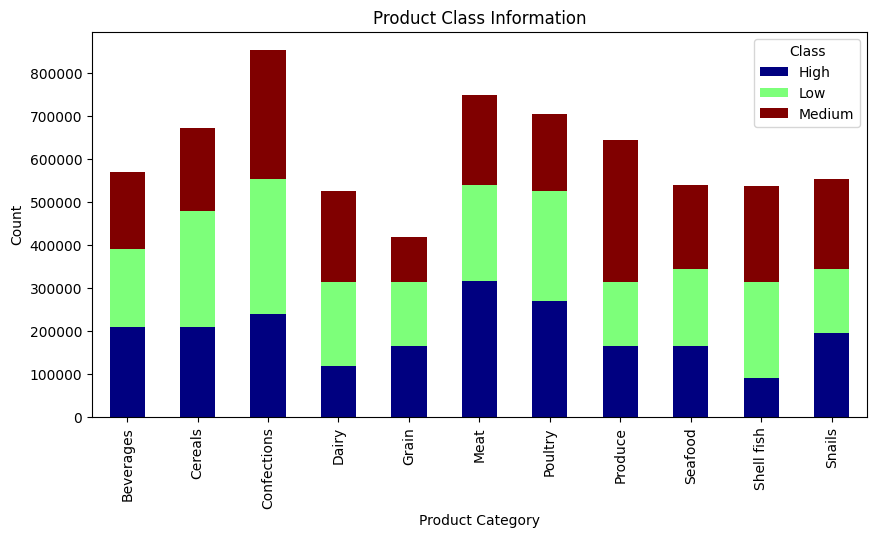

In [44]:
#product Class Information
merged_df.groupby('CategoryName')['Class'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5), colormap='jet')
plt.title('Product Class Information')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()